In [3]:
import pandas as pd
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..')) # hack to import my own metrics file
import metrics
import model_pipeline
from sklearn.model_selection import train_test_split

# read and prep data

In [4]:
playlist_dir = r"/Users/jamesmoro/Documents/Python/playlist-recommender/playlist-creator/data/playlist_df.pkl"
df = pd.read_pickle(playlist_dir)

In [5]:
X,y  = model_pipeline.prep_playlist_df()

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.35, 
                                                   random_state=0, 
                                                   stratify  = y, 
                                                   shuffle = True)

In [7]:
print(X_train.shape, X_test.shape)

(1571, 15) (846, 15)


# Pipeline

In [8]:
pipeline = model_pipeline.make_model_pipeline(X)

In [9]:
pipeline

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['artist_names',
                                                   'track_names'])])),
                ('sampler', RandomOverSampler()),
                ('classifier', RandomForestClassifier())])

In [10]:
model = pipeline.fit(X_train, y_train)

In [11]:
model.score(X_test, y_test)

0.3617021276595745

In [12]:
y_pred = model.predict(X_test)

In [13]:
metrics.f1(y_test, y_pred)

0.2873317877849767

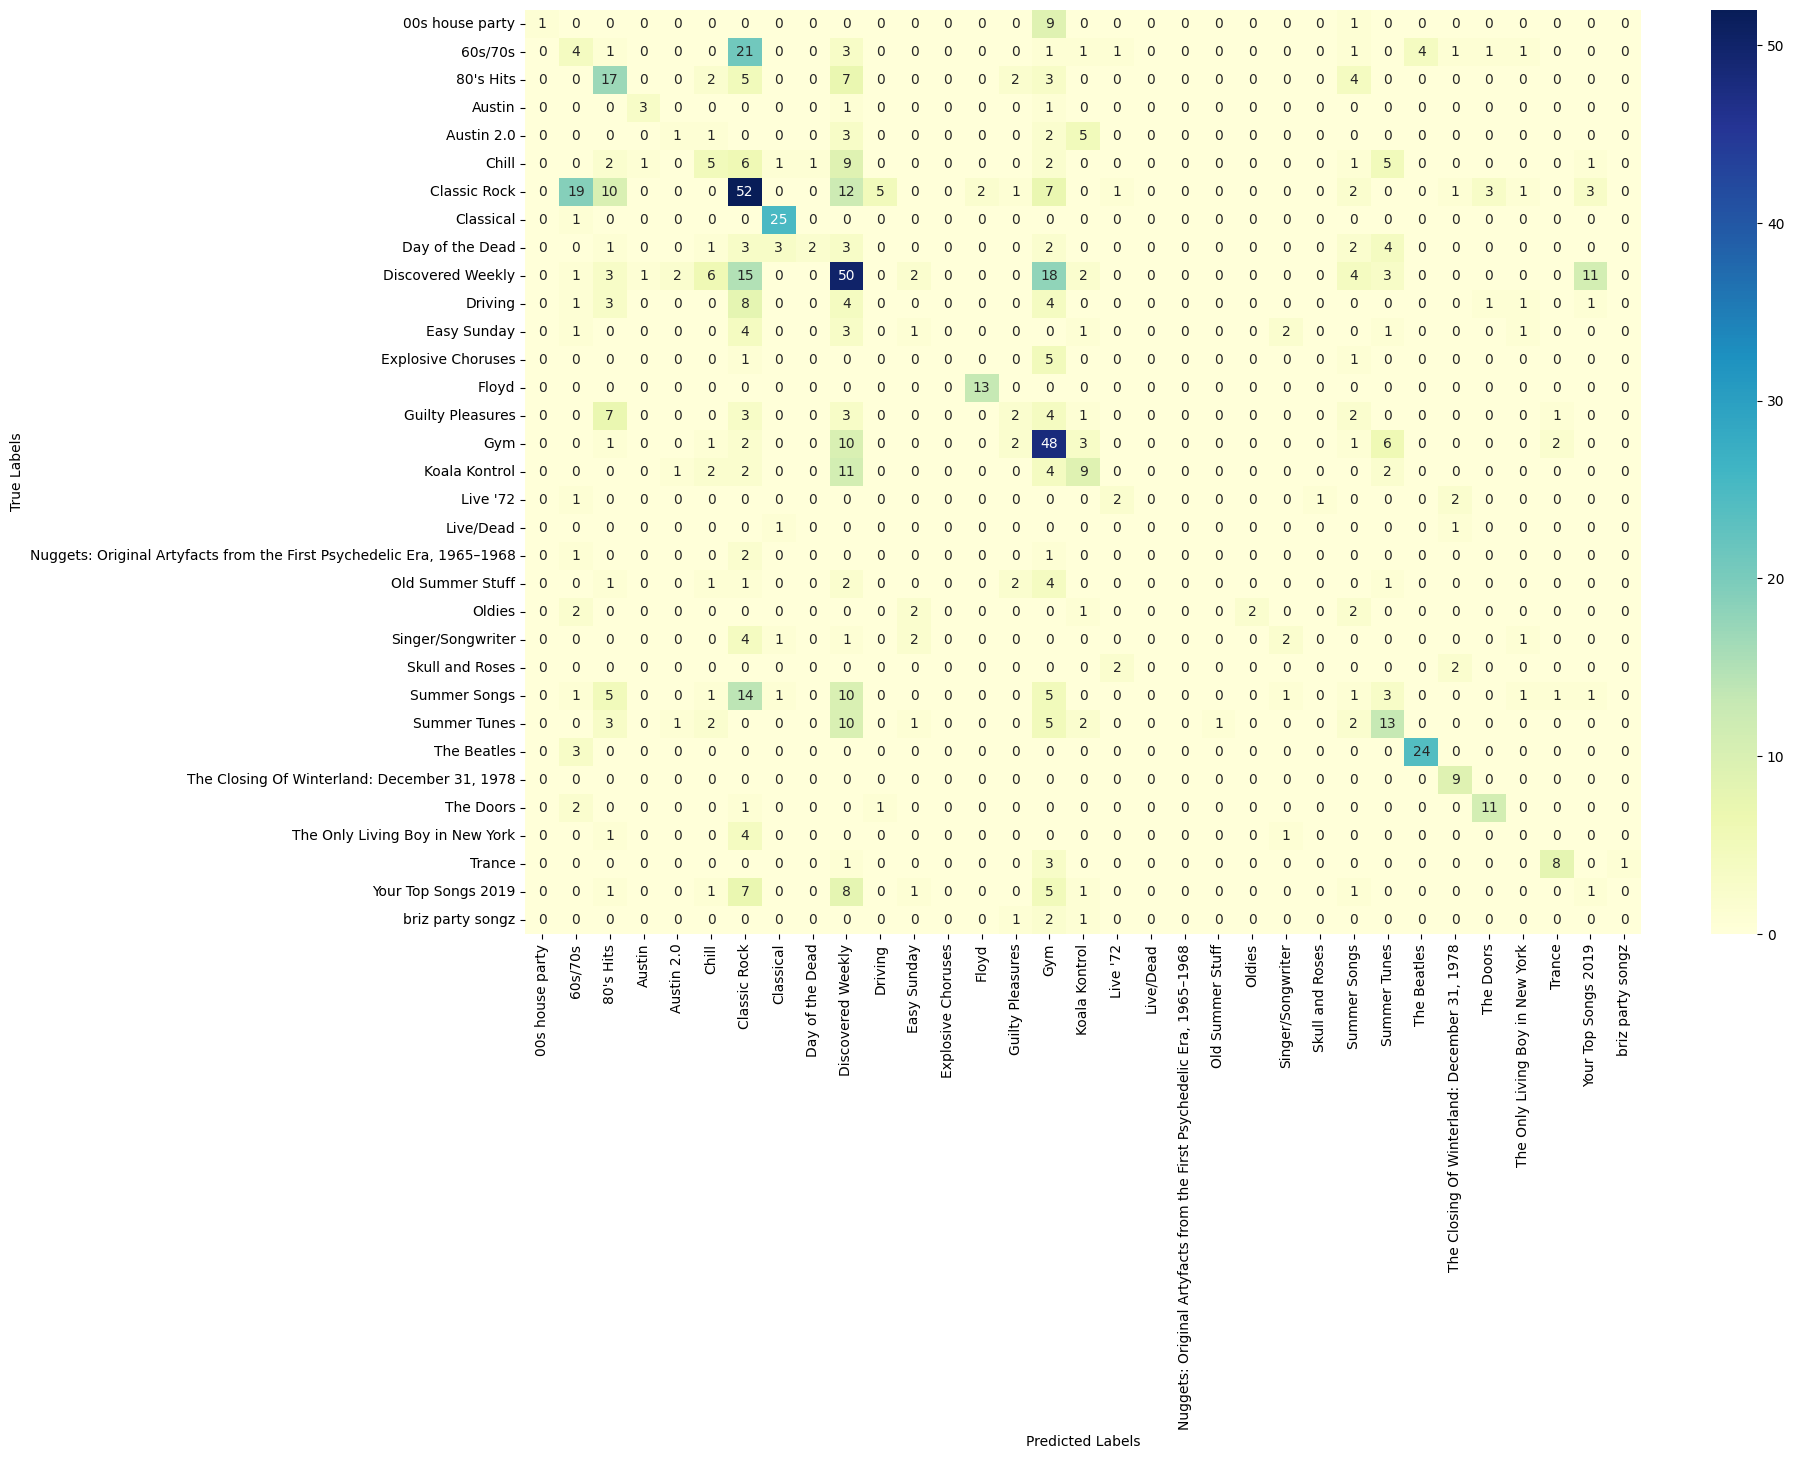

In [14]:
metrics.confusion_matrix(y_test, y_pred)